In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
automobile_df = pd.read_csv('/cfsshares/prd/wmla/sigs/aaaixusr1/notebooks/aa-jupyter-sig-2-3-1/8ff5ce39-e7c7-4a6e-81e1-b62e40434236/DillardsJupyter-5-4-0-11/notebooks/Pluralsight/Datasets/auto-mpg-processed.csv')

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
322,12.0,8,350.0,180,4499,12.5,46
274,25.0,6,181.0,110,2945,16.4,37
197,18.5,6,250.0,98,3525,19.0,42
300,11.0,8,400.0,150,4997,14.0,46
364,23.0,4,120.0,88,2957,17.0,44


In [7]:
from sklearn.model_selection import train_test_split

X = automobile_df[['horsepower']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
x_train.sample(5)

,horsepower
240,63
258,80
64,72
304,96
3,89


In [9]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
# Normalizing for more complicated models is recommended

In [10]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6010177574313555


In [12]:
y_pred = linear_model.predict(x_test)

In [13]:
from sklearn.metrics import r2_score

print('Testing score: ', r2_score(y_test, y_pred))
# When test score > training score, the model is good. Otherwise, the model is overfitted.

Testing score:  0.6220298157616166


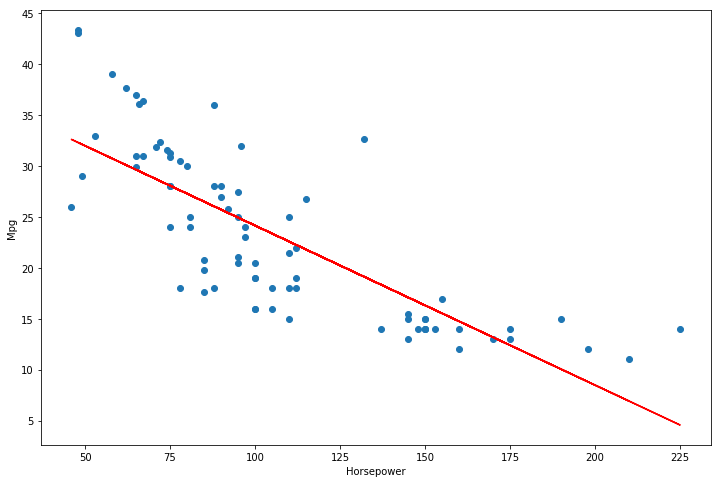

In [14]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

In [15]:
X = automobile_df[['age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.3212004957403568
Testing score:  0.3999172462881635


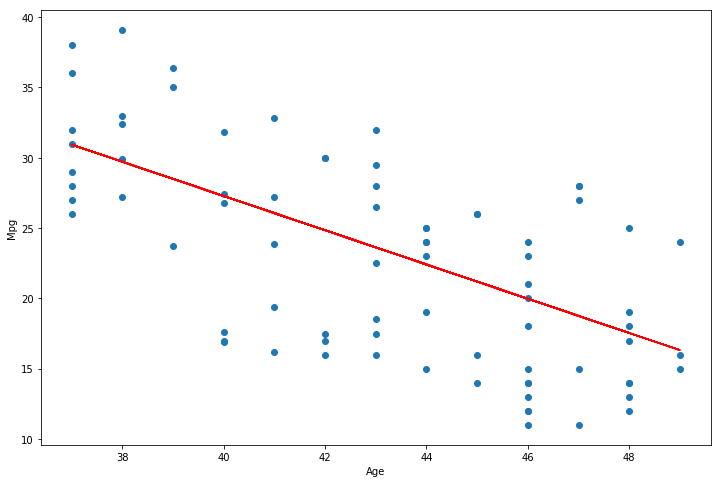

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [17]:
X = automobile_df[['displacement','horsepower','weight']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [19]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6966146395790566


In [20]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

horsepower     -0.044019
weight         -0.005550
displacement   -0.003408
dtype: float64


In [21]:
y_pred = linear_model.predict(x_test)

In [22]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.7250957176738893


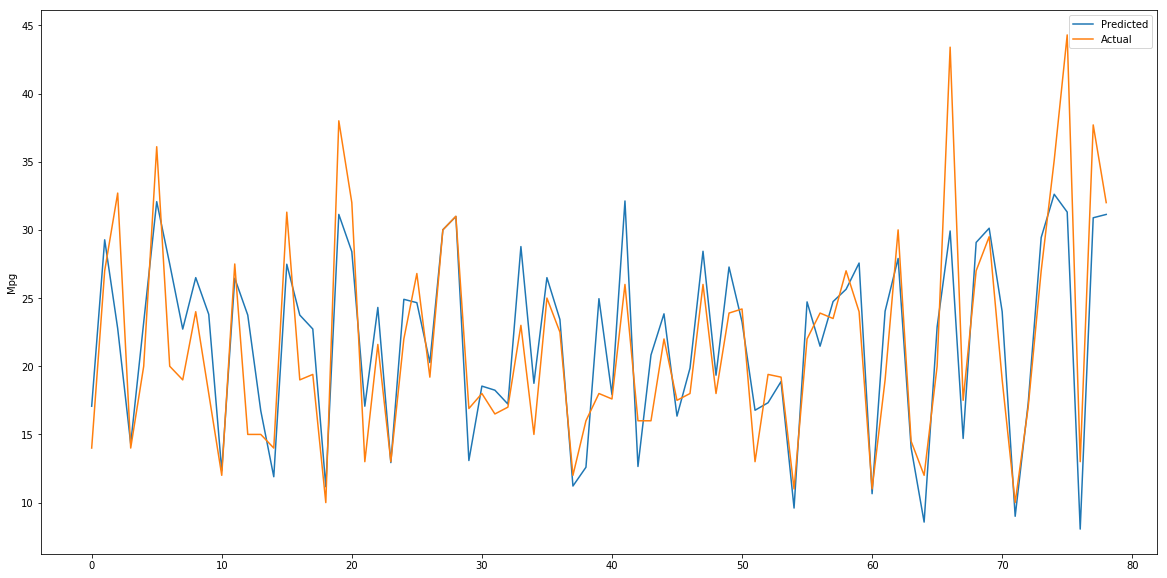

In [23]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Mpg')

plt.legend()
plt.show()

In [24]:
# Kitchen-sink Regression: Throwing all or most features into the model
X = automobile_df[['displacement','horsepower','weight','acceleration','cylinders']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [26]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.7104496220310637


In [27]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

cylinders      -0.298709
acceleration   -0.089381
horsepower     -0.043950
displacement   -0.007687
weight         -0.004770
dtype: float64


In [28]:
y_pred = linear_model.predict(x_test)

In [29]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6756543163580799


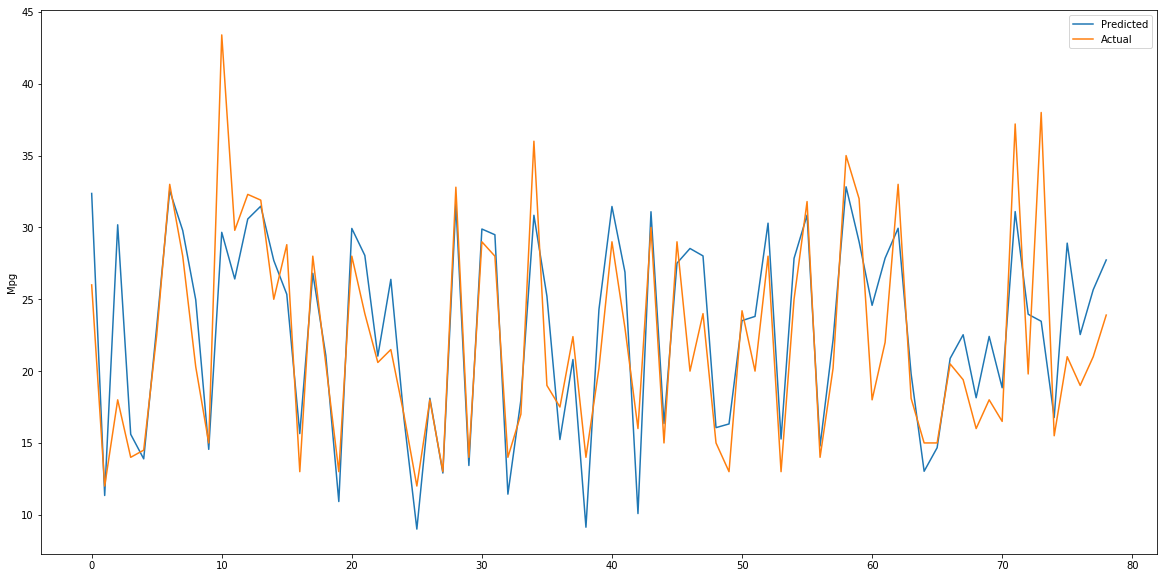

In [30]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Mpg')

plt.legend()
plt.show()